In [111]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib
import os
import seaborn as sns
sns.set_style('darkgrid')
plt.xkcd()

<matplotlib.pyplot.xkcd.<locals>.dummy_ctx at 0x7f2d45898320>

#### We will analyse only a particular case: Xerox Corp.
#### This company has a very interesting history and has seen both rise and fall in the recent years.

In [112]:
PATH = "Stocks/xrx.us.txt"

data = pd.read_csv(PATH)

In [113]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,10307.000000,10307.000000,10307.000000,10307.000000,1.030700e+04,10307.0
mean,45.368994,45.938168,44.772266,45.369831,1.311293e+06,0.0
std,32.749195,33.222459,32.202276,32.702489,1.545046e+06,0.0
min,14.283000,14.961000,12.592000,14.114000,0.000000e+00,0.0
25%,28.322500,28.669000,27.925000,28.330000,4.045200e+05,0.0
50%,34.762000,35.145000,34.390000,34.730000,8.062930e+05,0.0
75%,48.165000,48.712000,47.626000,48.231000,1.677192e+06,0.0
max,210.060000,210.660000,199.330000,209.850000,4.222526e+07,0.0


In [114]:
data['Close'].max() - data['Close'].min()

195.736

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10307 entries, 0 to 10306
Data columns (total 7 columns):
Date       10307 non-null object
Open       10307 non-null float64
High       10307 non-null float64
Low        10307 non-null float64
Close      10307 non-null float64
Volume     10307 non-null int64
OpenInt    10307 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 563.7+ KB


In [116]:
data.drop(['OpenInt'], inplace = True, axis = 1)

In [117]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1977-01-03,31.883,32.224,31.883,31.952,132241
1,1977-01-04,31.952,32.087,31.478,31.547,111500
2,1977-01-05,31.547,32.020,31.140,31.341,148727
3,1977-01-06,31.341,31.680,31.072,31.276,131354
4,1977-01-07,31.276,31.411,30.599,31.140,111500


In [118]:
data.tail()

,Date,Open,High,Low,Close,Volume
10302,2017-11-06,29.02,29.240,28.80,29.08,1621409
10303,2017-11-07,29.14,29.140,28.54,28.59,2263546
10304,2017-11-08,28.59,29.500,28.51,29.37,2301663
10305,2017-11-09,29.08,29.555,29.07,29.27,1575988
10306,2017-11-10,29.20,29.390,29.02,29.17,1503340


In [119]:
data.Date.min()

'1977-01-03'

In [120]:
data.Date.max()

'2017-11-10'

In [121]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [122]:
data['Date'] = data['Date'].astype('datetime64[ns]')

In [123]:
data = data.set_index('Date')

In [124]:
data.index

DatetimeIndex(['1977-01-03', '1977-01-04', '1977-01-05', '1977-01-06',
               '1977-01-07', '1977-01-10', '1977-01-11', '1977-01-12',
               '1977-01-13', '1977-01-14',
               ...
               '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02',
               '2017-11-03', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10'],
              dtype='datetime64[ns]', name='Date', length=10307, freq=None)

In [125]:
# Take monthly averages to compress the data.
y = data.Close.resample('MS').mean()

In [126]:
y['2016':]

Date
2016-01-01    35.604211
2016-02-01    34.975150
2016-03-01    40.018727
2016-04-01    41.081190
2016-05-01    35.647429
2016-06-01    37.353500
2016-07-01    37.178150
2016-08-01    37.711043
2016-09-01    38.044286
2016-10-01    37.742762
2016-11-01    36.524000
2016-12-01    35.630905
2017-01-01    27.249250
2017-02-01    28.623579
2017-03-01    28.605478
2017-04-01    27.848158
2017-05-01    27.677591
2017-06-01    27.926500
2017-07-01    29.310550
2017-08-01    31.836348
2017-09-01    32.535000
2017-10-01    32.536818
2017-11-01    29.288750
Freq: MS, Name: Close, dtype: float64

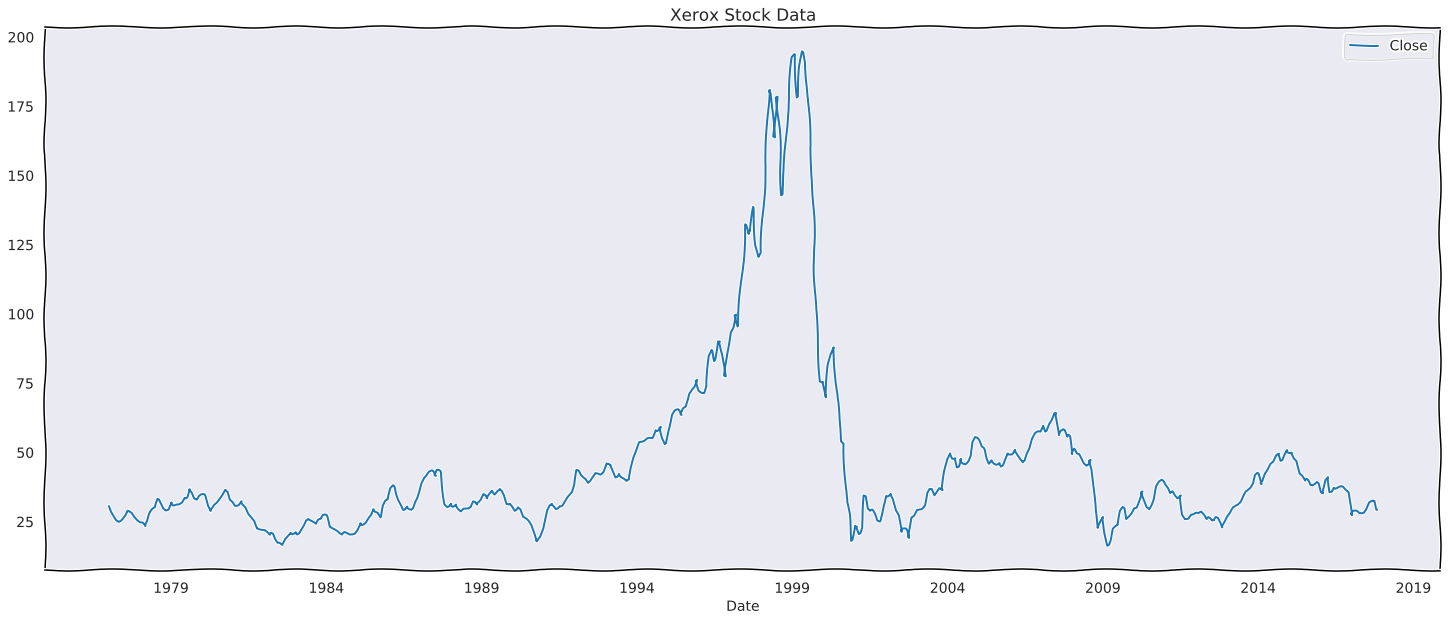

In [127]:
y.plot(figsize = (25,10))
plt.legend()
plt.title("Xerox Stock Data")
plt.show()

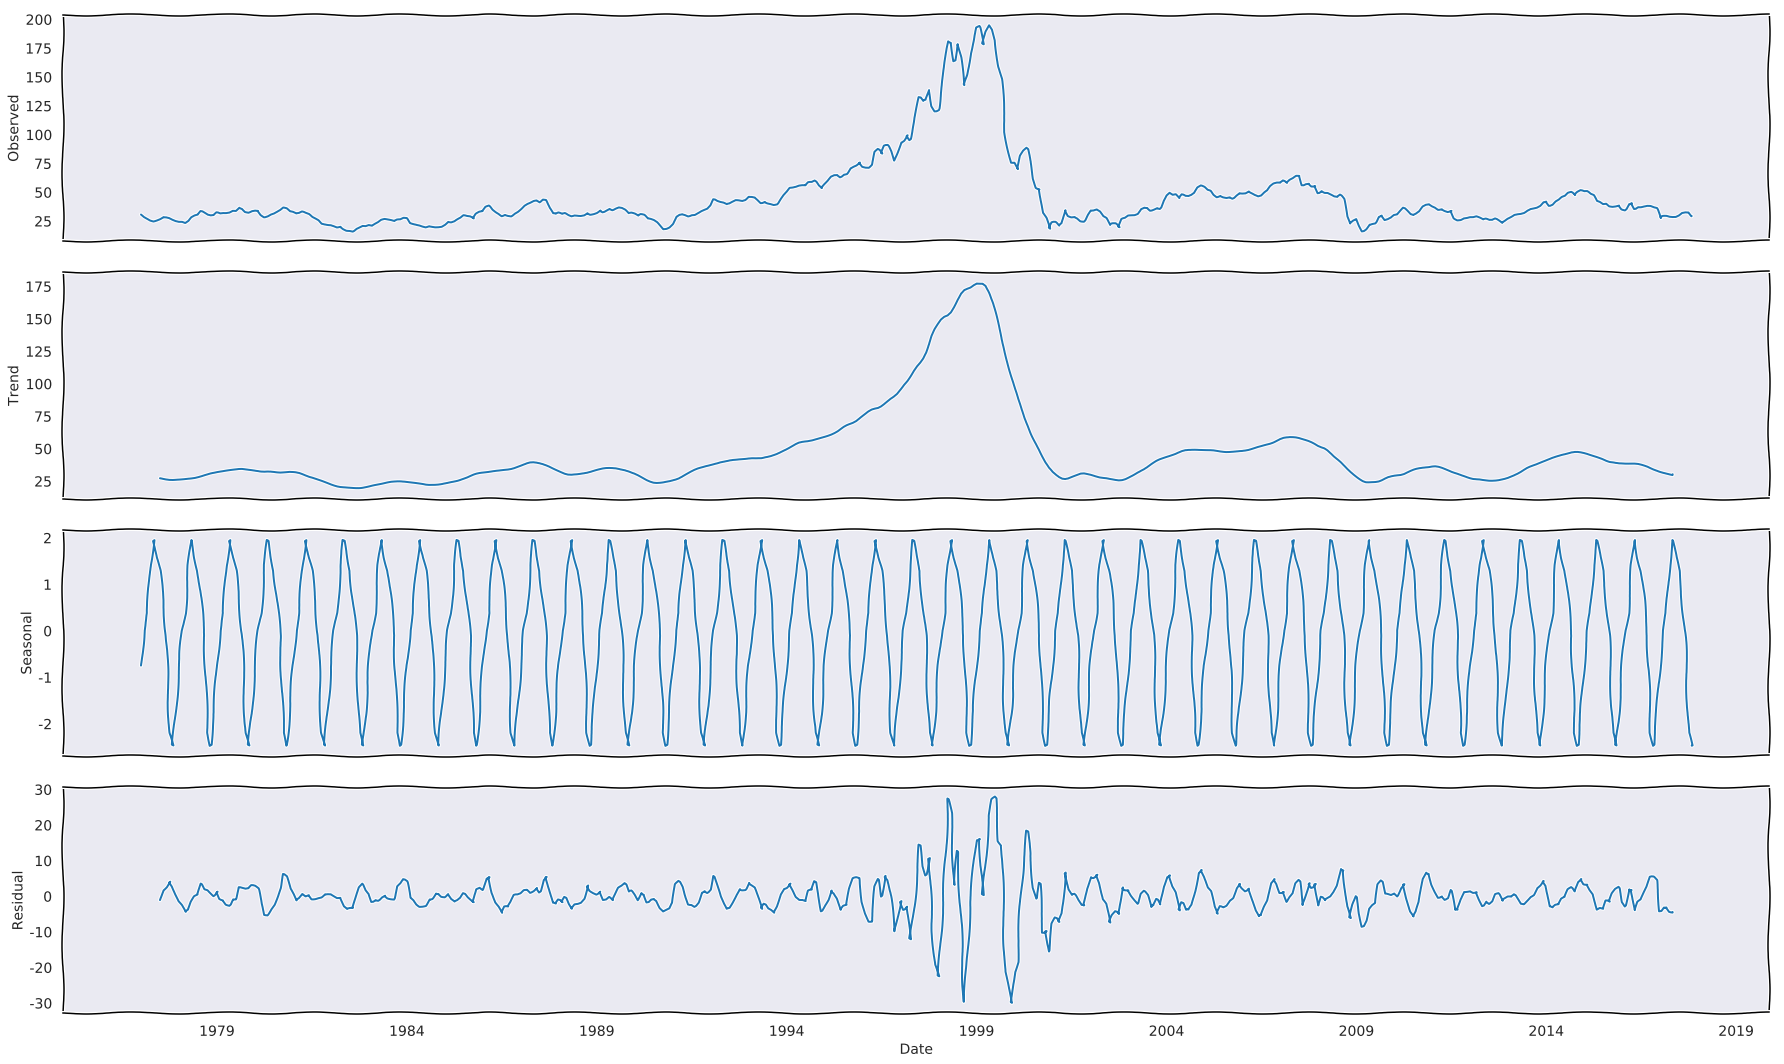

In [128]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 15

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [129]:
# Basic Forecasting with ARIMA : Not Completely Applicable
# Aim to conclude : ARIMA may not be the best model for forecasting

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [130]:
# Search Grid to find the best set of parametrs for ARIMA

min_aic = 9999999
min_params = "xox"
min_seasonal_params = "yoy"

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}20 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < min_aic:
                min_aic = results.aic
                min_params = param
                min_seasonal_params = param_seasonal
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)20 - AIC:4736.485889844301
ARIMA(0, 0, 0)x(0, 1, 1, 12)20 - AIC:4225.078407313594
ARIMA(0, 0, 0)x(1, 0, 0, 12)20 - AIC:4354.91907093411
ARIMA(0, 0, 0)x(1, 0, 1, 12)20 - AIC:4290.253639531135
ARIMA(0, 0, 0)x(1, 1, 0, 12)20 - AIC:4254.871102285071
ARIMA(0, 0, 0)x(1, 1, 1, 12)20 - AIC:4222.239093330842
ARIMA(0, 0, 1)x(0, 0, 0, 12)20 - AIC:4701.853808228983
ARIMA(0, 0, 1)x(0, 0, 1, 12)20 - AIC:4142.145842748054
ARIMA(0, 0, 1)x(0, 1, 0, 12)20 - AIC:3810.8379040255363
ARIMA(0, 0, 1)x(0, 1, 1, 12)20 - AIC:3698.734631583405
ARIMA(0, 0, 1)x(1, 0, 0, 12)20 - AIC:3804.636888760827
ARIMA(0, 0, 1)x(1, 0, 1, 12)20 - AIC:3797.9422039522415
ARIMA(0, 0, 1)x(1, 1, 0, 12)20 - AIC:3729.0825563281182
ARIMA(0, 0, 1)x(1, 1, 1, 12)20 - AIC:3695.334378302776
ARIMA(0, 1, 0)x(0, 0, 1, 12)20 - AIC:2868.7240481139884
ARIMA(0, 1, 0)x(0, 1, 1, 12)20 - AIC:2832.9731338112315
ARIMA(0, 1, 0)x(1, 0, 0, 12)20 - AIC:2873.7630571264135
ARIMA(0, 1, 0)x(1, 0, 1, 12)20 - AIC:2870.715493273791
ARIMA

In [131]:
print("Best Parameters:{0}, {1}".format(min_params, min_seasonal_params))

Best Parameters:(1, 1, 1), (0, 1, 1, 12)


In [132]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=min_params,
                                seasonal_order=min_seasonal_params,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4138      0.057      7.274      0.000       0.302       0.525
ma.L1         -0.1126      0.060     -1.881      0.060      -0.230       0.005
ma.S.L12      -1.0000    197.134     -0.005      0.996    -387.376     385.376
sigma2        21.4634   4231.344      0.005      0.996   -8271.818    8314.745


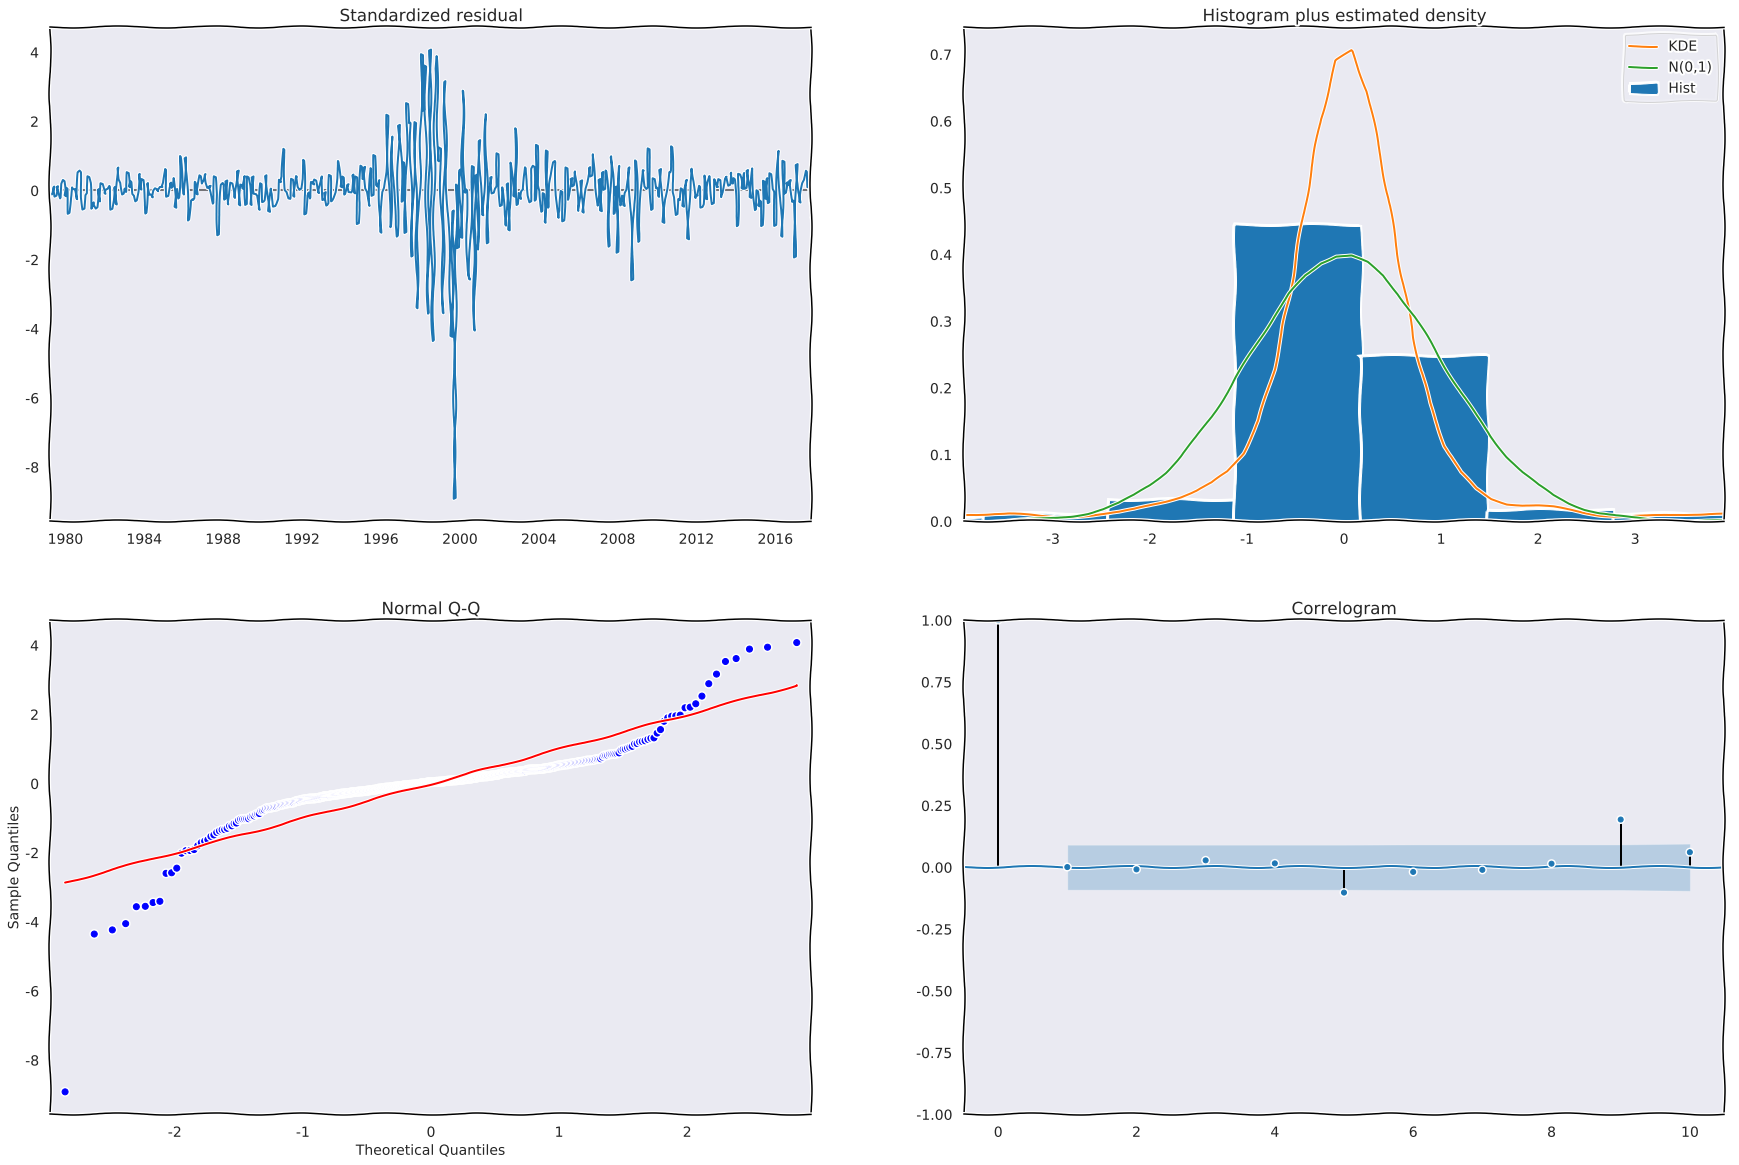

In [133]:
results.plot_diagnostics(figsize=(30, 20))
plt.show()

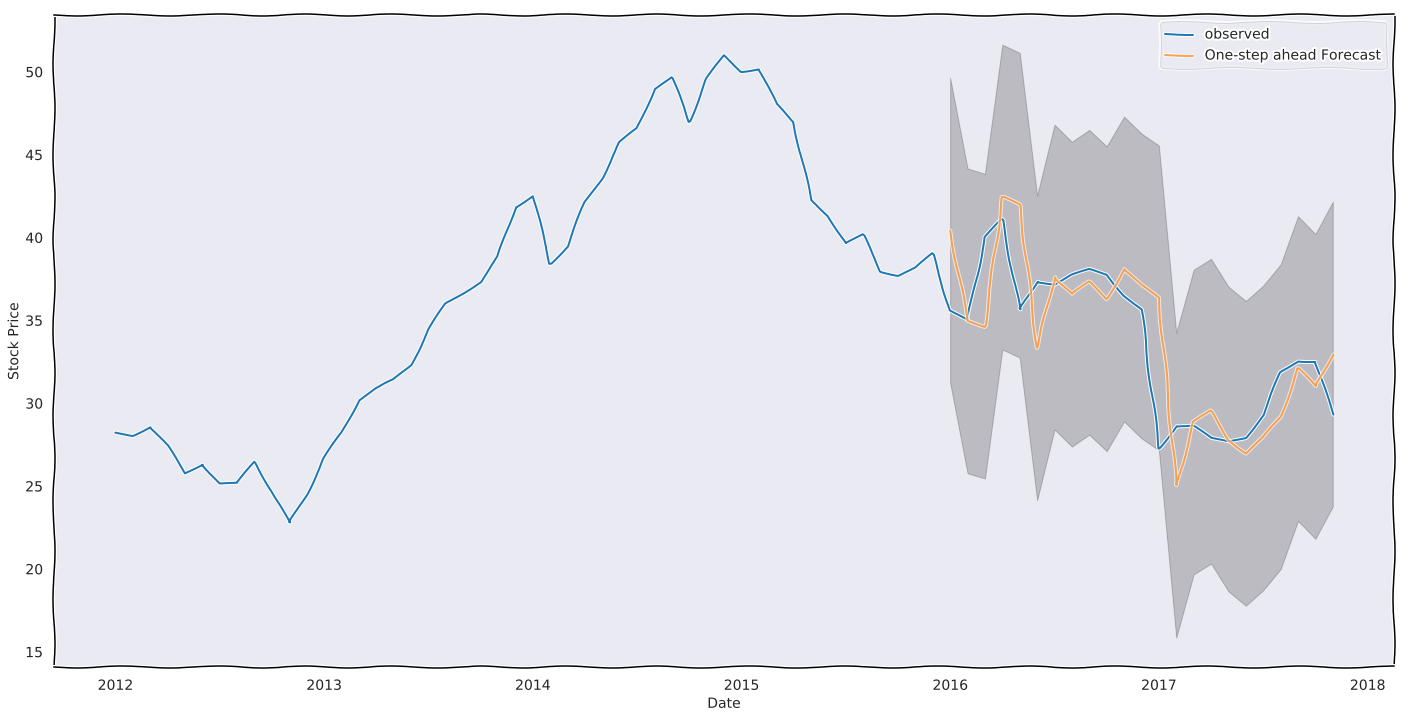

In [134]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(24,12))

ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
plt.legend()
plt.show()

In [135]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 10.56


### The MSE is not that bad : Considering the fact that the range of the price is 195.736.
#### But the prediction was done  within the range of dates which the model has already seen.

# Comparing Xerox with Google Stocks

In [136]:
data_google = pd.read_csv('Stocks/googl.us.txt')

In [137]:
data_google.describe()

,Open,High,Low,Close,Volume,OpenInt
count,3333.000000,3333.000000,3333.000000,3333.000000,3.333000e+03,3333.0
mean,389.993375,393.377354,386.213266,389.855821,7.951734e+06,0.0
std,235.104757,236.348229,233.616339,235.102374,8.327410e+06,0.0
min,49.595000,50.870000,47.980000,50.005000,0.000000e+00,0.0
25%,228.730000,230.930000,226.170000,228.510000,2.535424e+06,0.0
50%,295.980000,298.190000,293.350000,295.610000,5.201600e+06,0.0
75%,550.370000,554.780000,545.500000,549.490000,1.047400e+07,0.0
max,1050.050000,1063.620000,1047.050000,1058.290000,8.223340e+07,0.0


In [138]:
data_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
Date       3333 non-null object
Open       3333 non-null float64
High       3333 non-null float64
Low        3333 non-null float64
Close      3333 non-null float64
Volume     3333 non-null int64
OpenInt    3333 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 182.4+ KB


In [139]:
data_google['Close'].max() - data_google['Close'].min()

1008.285

In [140]:
data_google.drop(['OpenInt'], inplace = True, axis = 1)

In [141]:
data_google.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19,50.000,52.03,47.980,50.170,44703800
1,2004-08-20,50.505,54.54,50.250,54.155,22857200
2,2004-08-23,55.375,56.74,54.525,54.700,18274400
3,2004-08-24,55.620,55.80,51.785,52.435,15262600
4,2004-08-25,52.480,54.00,51.940,53.000,9197800


In [142]:
data_google.tail()

,Date,Open,High,Low,Close,Volume
3328,2017-11-06,1049.10,1052.59,1042.00,1042.68,913954
3329,2017-11-07,1049.65,1053.41,1043.00,1052.39,1303832
3330,2017-11-08,1050.05,1062.69,1047.05,1058.29,1214469
3331,2017-11-09,1048.00,1050.88,1035.85,1047.72,1793994
3332,2017-11-10,1043.87,1046.63,1041.22,1044.15,970498


In [143]:
data_google['Date'] = data_google['Date'].astype('datetime64[ns]')

In [144]:
data_google = data_google.set_index('Date')

In [145]:
# Take monthly averages to compress the data.
y_google = data_google.Close.resample('MS').mean()

In [146]:
y_google['2016':]

Date
2016-01-01     736.582105
2016-02-01     724.390500
2016-03-01     746.787273
2016-04-01     756.660000
2016-05-01     726.528571
2016-06-01     719.605000
2016-07-01     741.064500
2016-08-01     800.218261
2016-09-01     801.606429
2016-10-01     813.661905
2016-11-01     784.761429
2016-12-01     800.593476
2017-01-01     830.249000
2017-02-01     836.757895
2017-03-01     853.784130
2017-04-01     861.378158
2017-05-01     961.653636
2017-06-01     973.369545
2017-07-01     963.437000
2017-08-01     937.960870
2017-09-01     945.843500
2017-10-01     999.145000
2017-11-01    1047.598750
Freq: MS, Name: Close, dtype: float64

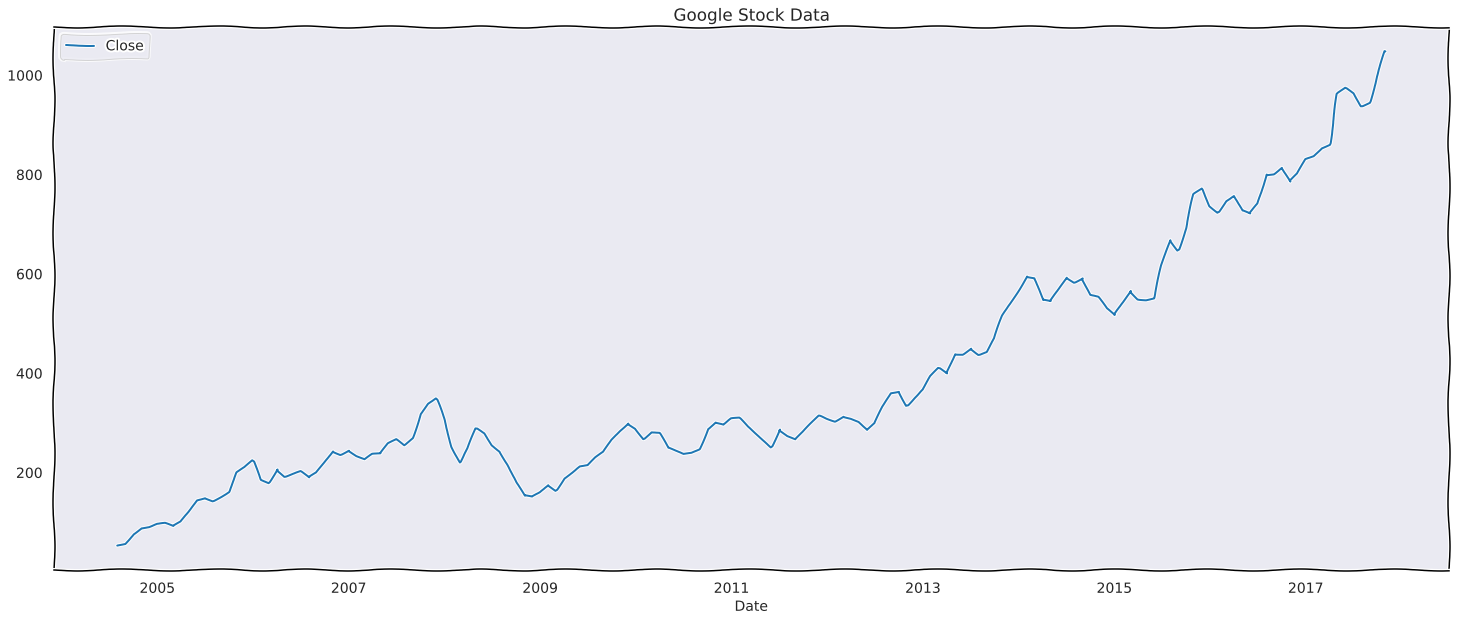

In [147]:
y_google.plot(figsize = (25,10))
plt.legend()
plt.title("Google Stock Data")
plt.show()

In [148]:
y_xerox = y[y_google.index[0]:]

In [149]:
y_xerox[:20]

Date
2004-08-01    45.852409
2004-09-01    46.856238
2004-10-01    48.818048
2004-11-01    53.644143
2004-12-01    55.329727
2005-01-01    54.213950
2005-02-01    51.939579
2005-03-01    51.217409
2005-04-01    47.785333
2005-05-01    45.864238
2005-06-01    47.182136
2005-07-01    46.102100
2005-08-01    45.669130
2005-09-01    46.316048
2005-10-01    45.056905
2005-11-01    47.646667
2005-12-01    49.722000
2006-01-01    49.445250
2006-02-01    49.517158
2006-03-01    50.987435
Freq: MS, Name: Close, dtype: float64

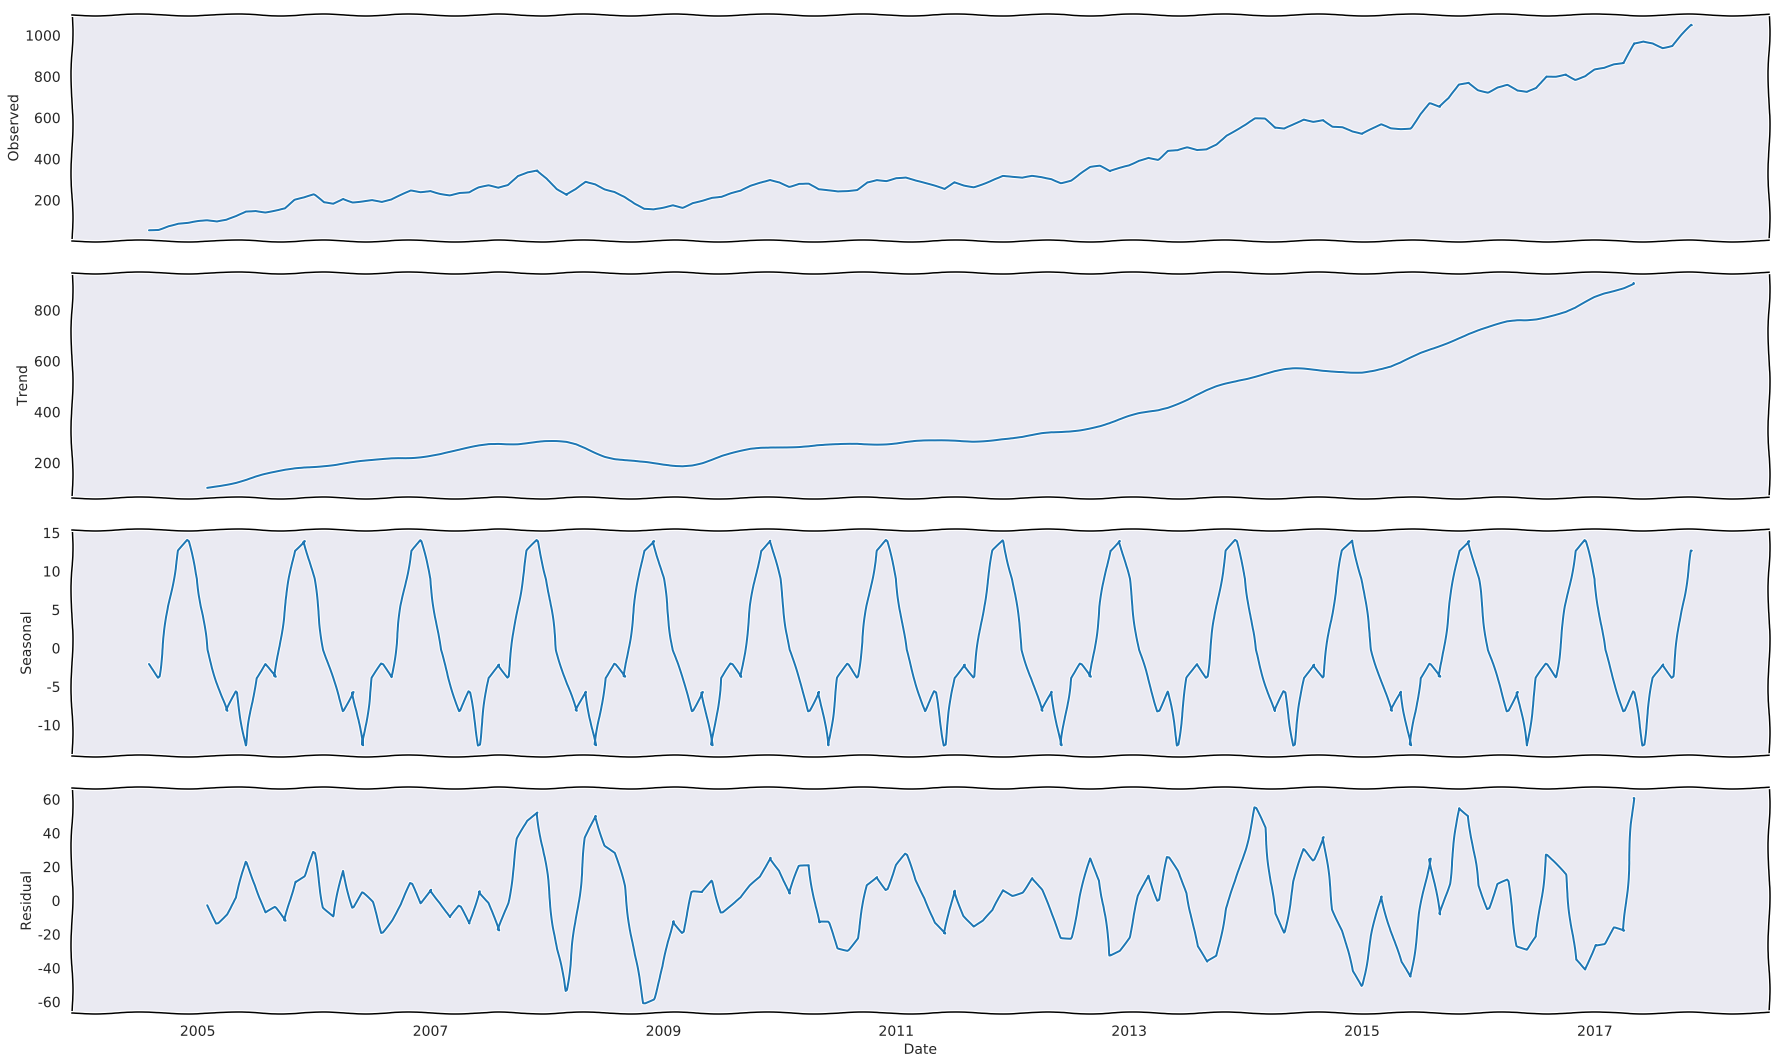

In [150]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 15

decomposition = sm.tsa.seasonal_decompose(y_google, model='additive')
fig = decomposition.plot()
plt.show()

In [151]:
# Search Grid to find the best set of parametrs for ARIMA

min_aic = 9999999
min_params = "xox"
min_seasonal_params = "yoy"

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_google,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}20 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < min_aic:
                min_aic = results.aic
                min_params = param
                min_seasonal_params = param_seasonal
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)20 - AIC:2097.3975762972873
ARIMA(0, 0, 0)x(0, 1, 1, 12)20 - AIC:1643.7162557385877
ARIMA(0, 0, 0)x(1, 0, 0, 12)20 - AIC:1716.0442285241481
ARIMA(0, 0, 0)x(1, 0, 1, 12)20 - AIC:1672.7661753865013
ARIMA(0, 0, 0)x(1, 1, 0, 12)20 - AIC:1649.5507781783813
ARIMA(0, 0, 0)x(1, 1, 1, 12)20 - AIC:1607.3311308975913
ARIMA(0, 0, 1)x(0, 0, 0, 12)20 - AIC:2182.2074814334965
ARIMA(0, 0, 1)x(0, 0, 1, 12)20 - AIC:1900.1081976418354
ARIMA(0, 0, 1)x(0, 1, 0, 12)20 - AIC:1617.5537824065161
ARIMA(0, 0, 1)x(0, 1, 1, 12)20 - AIC:1487.594370570219
ARIMA(0, 0, 1)x(1, 0, 0, 12)20 - AIC:1573.1486567617783
ARIMA(0, 0, 1)x(1, 0, 1, 12)20 - AIC:1519.3275286514227
ARIMA(0, 0, 1)x(1, 1, 0, 12)20 - AIC:1506.8612493820333
ARIMA(0, 0, 1)x(1, 1, 1, 12)20 - AIC:1465.64144287608
ARIMA(0, 1, 0)x(0, 0, 1, 12)20 - AIC:1354.891716012453
ARIMA(0, 1, 0)x(0, 1, 1, 12)20 - AIC:1257.8226157133784
ARIMA(0, 1, 0)x(1, 0, 0, 12)20 - AIC:1363.3277430230546
ARIMA(0, 1, 0)x(1, 0, 1, 12)20 - AIC:1355.0569330933

In [152]:
print("Best Parameters:{0}, {1}".format(min_params, min_seasonal_params))

Best Parameters:(0, 1, 1), (0, 1, 1, 12)


In [153]:
mod = sm.tsa.statespace.SARIMAX(y_google,
                                order=min_params,
                                seasonal_order=min_seasonal_params,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_google = mod.fit()
print(results_google.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3505      0.083      4.207      0.000       0.187       0.514
ma.S.L12      -1.1664      0.134     -8.734      0.000      -1.428      -0.905
sigma2       420.5869     88.983      4.727      0.000     246.183     594.991


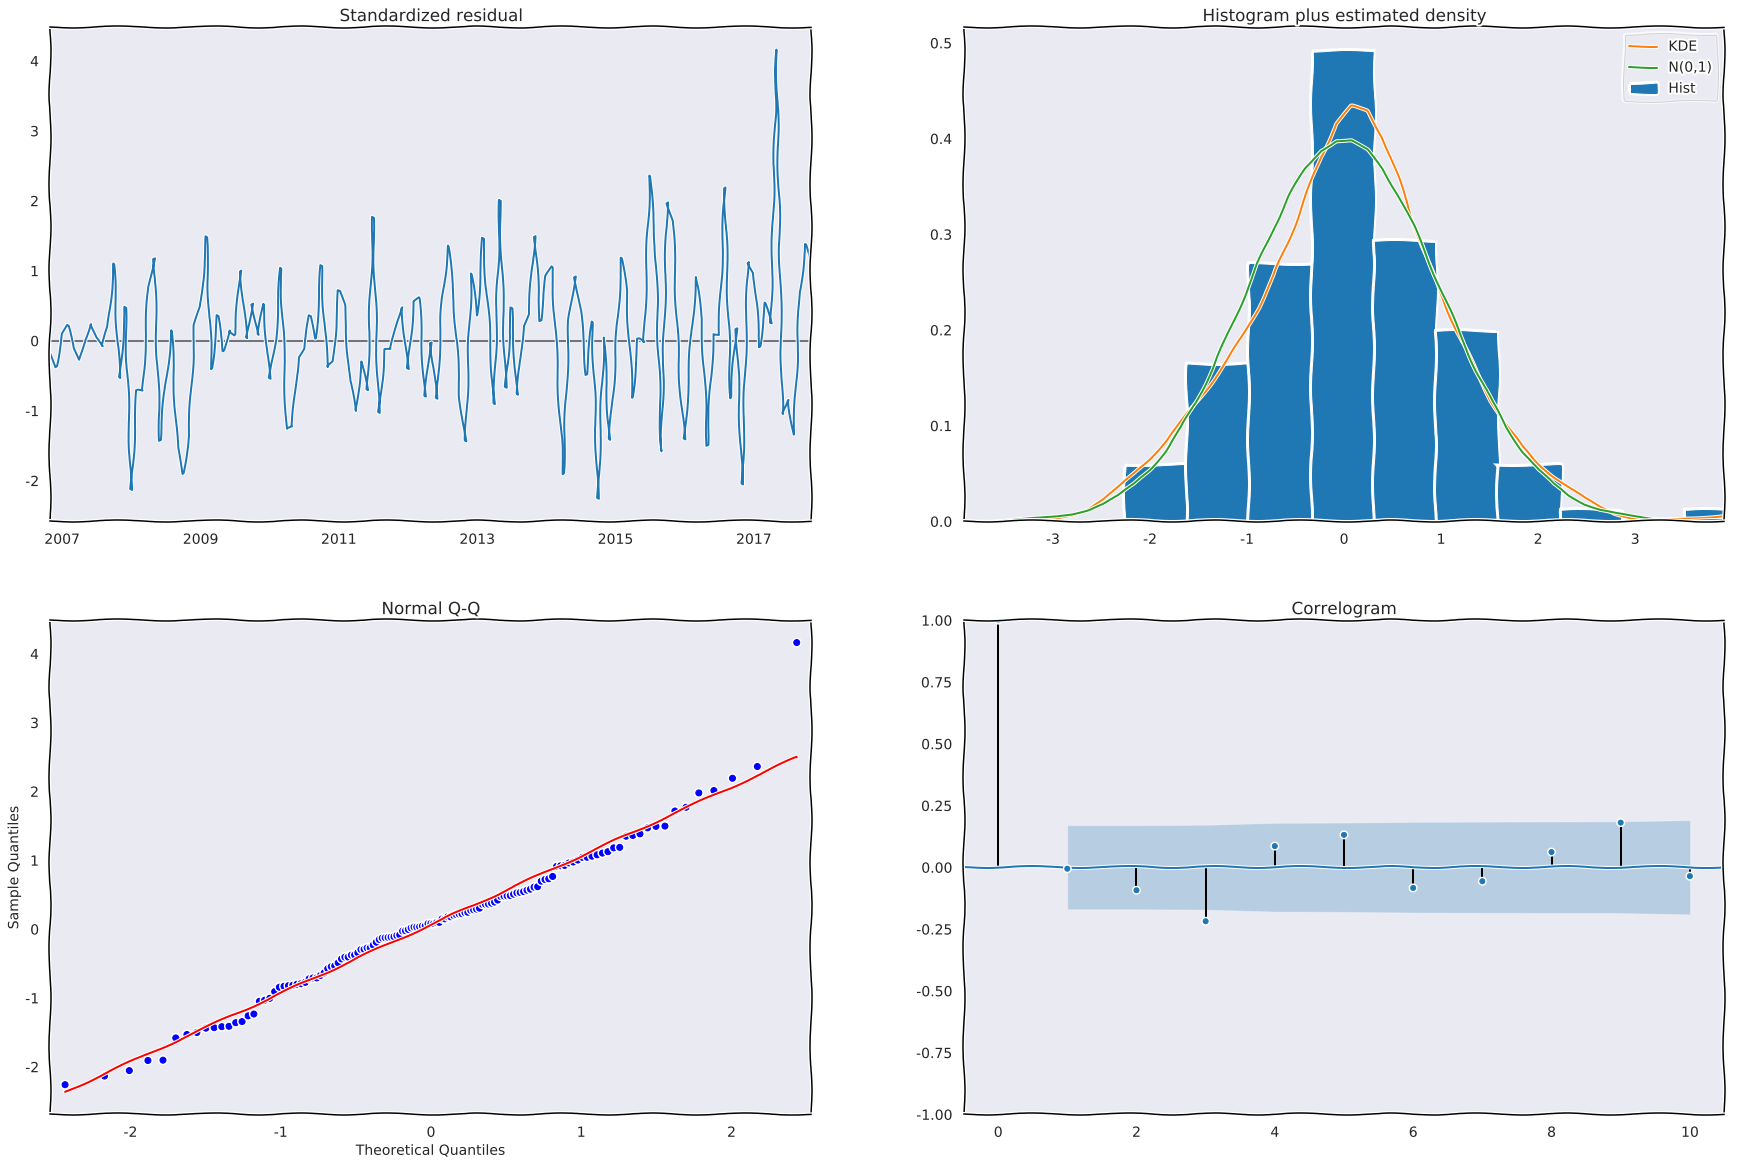

In [154]:
results_google.plot_diagnostics(figsize=(30, 20))
plt.show()

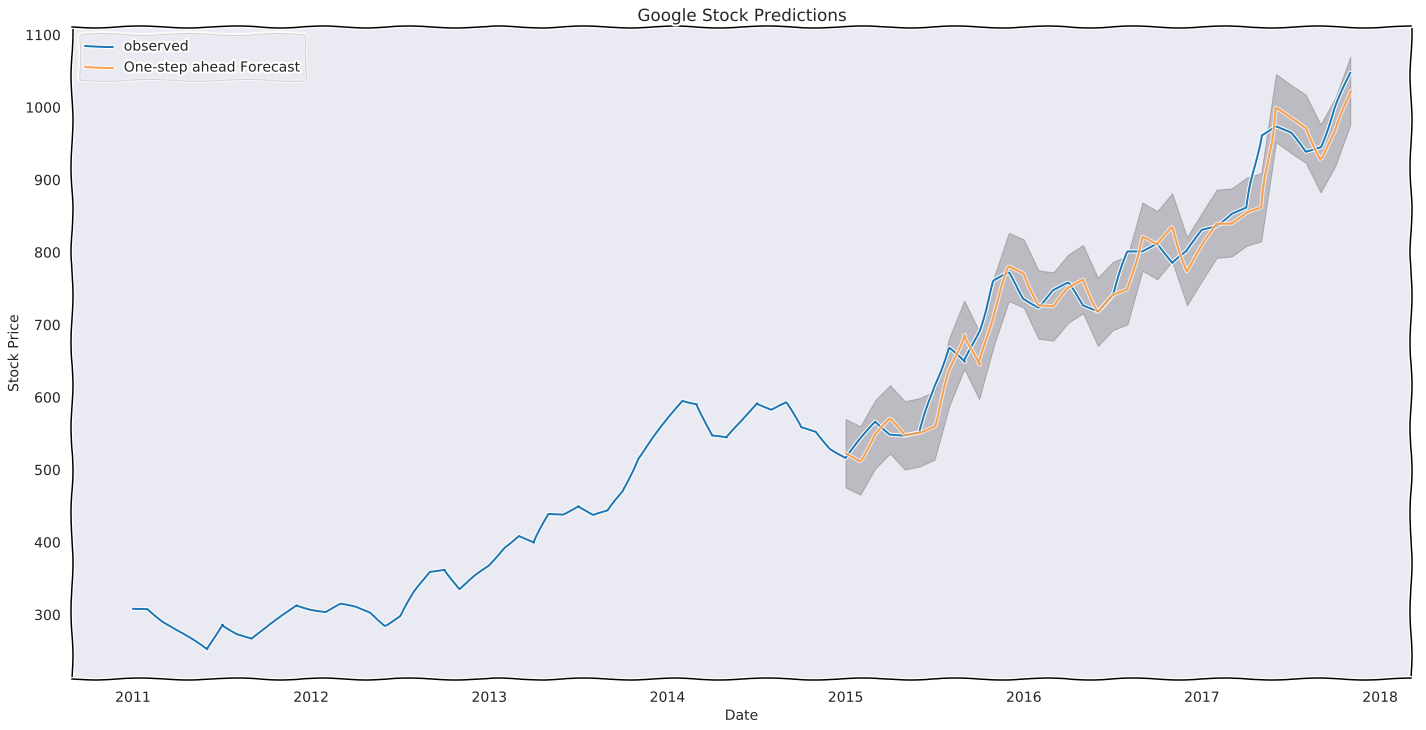

In [155]:
pred = results_google.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y_google['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(24,12))

ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.title("Google Stock Predictions")
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
plt.legend()
plt.show()

In [156]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 541927.46


In [157]:
data_combined = pd.concat([y_xerox, y_google], axis=1, join_axes=[y_xerox.index])
data_combined.columns = ["Xerox", "Google"]

In [158]:
data_combined.head()

,Xerox,Google
Date,,
2004-08-01,45.852409,52.631111
2004-09-01,46.856238,56.613571
2004-10-01,48.818048,76.615476
2004-11-01,53.644143,88.747619
2004-12-01,55.329727,90.885000


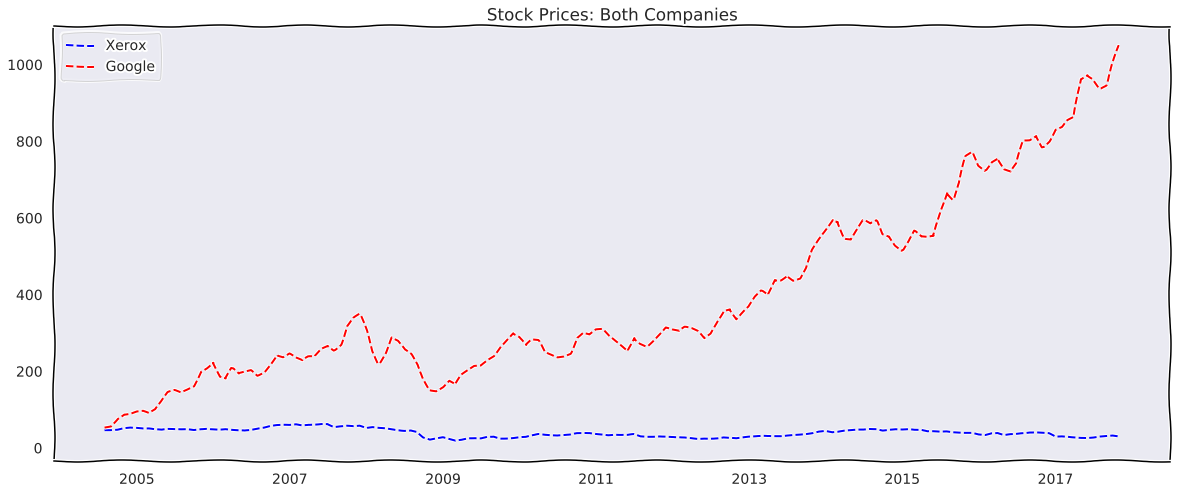

In [159]:
plt.figure(figsize=(20, 8))
plt.plot(data_combined.index, data_combined.Xerox,'b--', label = "Xerox" )
plt.plot(data_combined.index, data_combined.Google, 'r--', label = 'Google')
plt.title("Stock Prices: Both Companies")
plt.legend()
plt.show()

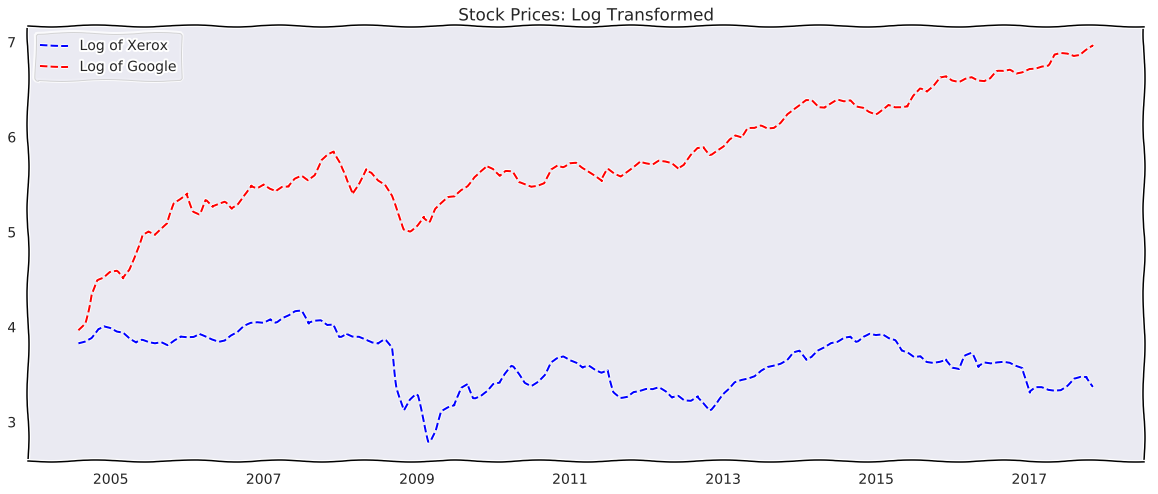

In [160]:
plt.figure(figsize=(20, 8))
plt.plot(data_combined.index, np.log(data_combined.Xerox),'b--', label = "Log of Xerox" )
plt.plot(data_combined.index, np.log(data_combined.Google), 'r--', label = 'Log of Google')
plt.title("Stock Prices: Log Transformed")
plt.legend()
plt.show()

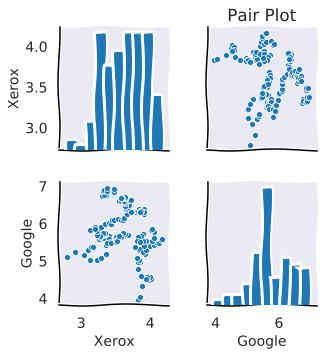

In [161]:
data_combined_log = np.log(data_combined)
sns.pairplot(data_combined_log)
plt.title("Pair Plot")
plt.show()

In [162]:
print(data_combined.head())
print(data_combined_log.head())

                Xerox     Google
Date                            
2004-08-01  45.852409  52.631111
2004-09-01  46.856238  56.613571
2004-10-01  48.818048  76.615476
2004-11-01  53.644143  88.747619
2004-12-01  55.329727  90.885000
               Xerox    Google
Date                          
2004-08-01  3.825428  3.963307
2004-09-01  3.847084  4.036249
2004-10-01  3.888100  4.338799
2004-11-01  3.982372  4.485797
2004-12-01  4.013310  4.509595


### Forecasting Using Prophet

In [163]:
from fbprophet import Prophet

xerox_model_data = pd.DataFrame(data = {'ds': data_combined_log.index, 'y':data_combined_log.Xerox})
google_model_data = pd.DataFrame(data = {'ds': data_combined_log.index, 'y': data_combined_log.Google})

model_xerox = Prophet(changepoint_prior_scale = 0.15)
model_xerox.fit(xerox_model_data)

model_google = Prophet(changepoint_prior_scale = 0.15)
model_google.fit(google_model_data)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [164]:
xerox_future = model_xerox.make_future_dataframe(periods=48, freq='m')
google_future = model_google.make_future_dataframe(periods=48, freq='m')

In [165]:
xerox_forecast = model_xerox.predict(xerox_future)
google_forecast = model_google.predict(google_future)

<Figure size 2880x720 with 0 Axes>

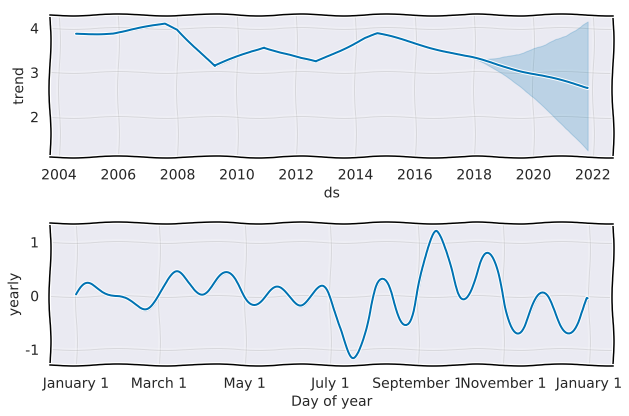

In [170]:
plt.figure(figsize = (40,10))
model_xerox.plot_components(xerox_forecast)
plt.show()

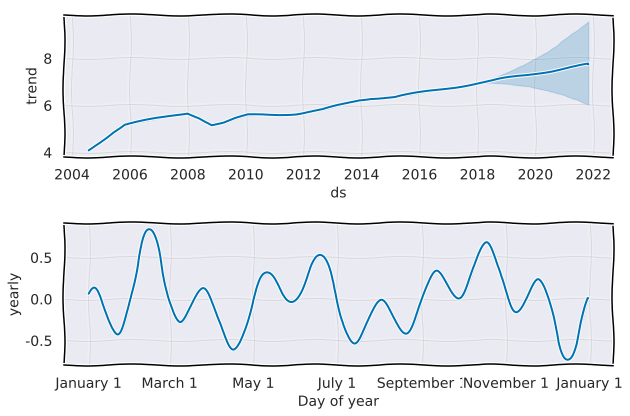

In [171]:
model_google.plot_components(google_forecast)
plt.show()

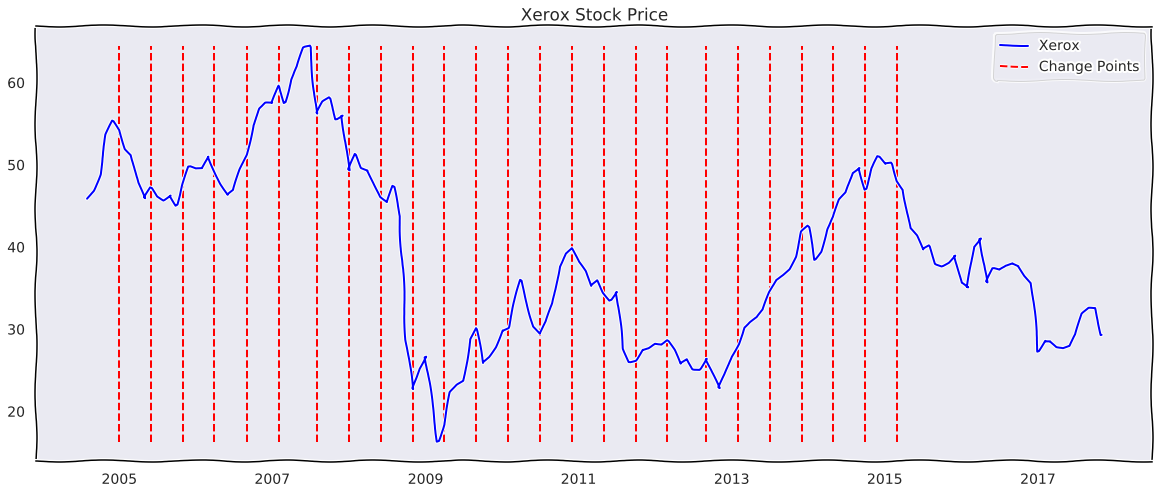

In [172]:
# Plotting Change Points


plt.figure(figsize=(20, 8))
plt.plot(data_combined.index.values, data_combined.Xerox,'b', label = "Xerox" )
plt.vlines(model_xerox.changepoints.values, color = 'r', linestyles='dashed', label='Change Points', ymin = data_combined.Xerox.min(), ymax= data_combined.Xerox.max())
plt.title("Xerox Stock Price")
plt.legend()
plt.show()

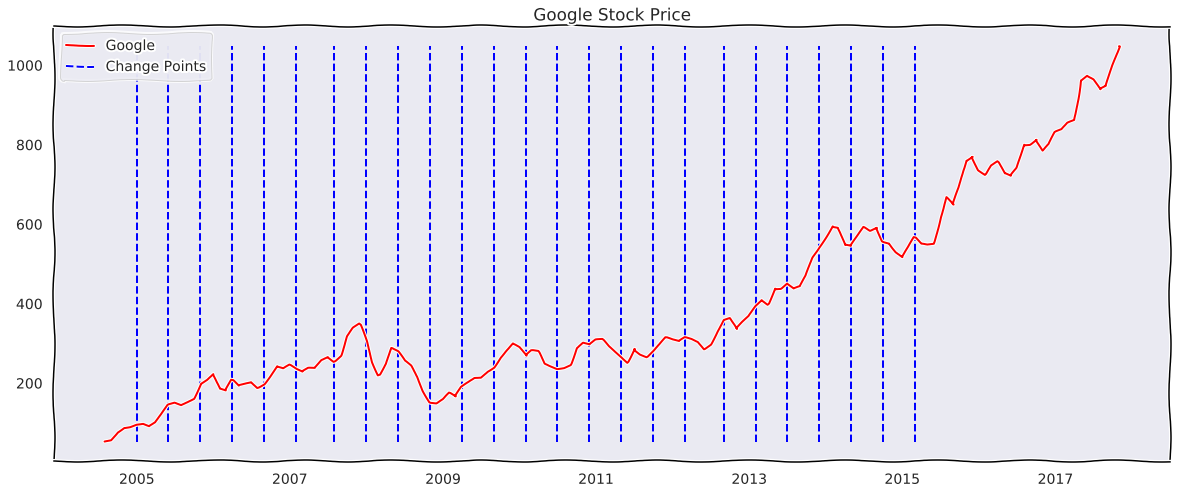

In [173]:
plt.figure(figsize=(20, 8))
plt.plot(data_combined.index.values, data_combined.Google,'r', label = "Google" )
plt.vlines(model_google.changepoints.values, color = 'b', linestyles='dashed', label='Change Points', ymin = data_combined.Google.min(), ymax= data_combined.Google.max())
plt.title("Google Stock Price")
plt.legend()
plt.show()